In [1]:
!pip install scikit-learn

In [14]:
# Import necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [15]:
# Load dataset 
ep = pd.read_csv(r"C:\Users\DAMILOLA\Desktop\Python\Heart Disease Using Machine Learning(Supervised Learning)\heart - heart.csv")
ep.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Features in the dataset and meaning:

- age - age in years,
- sex - (1 = male; 0 = Female),
- cp - chest pain type (1: typical agina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic),
- trestbps - resting blood pressure (in mm Hg on admission to the hospital),
- fbs - (fasting blood sugar > 120 mg/dl)(1 = true; 0 = false),
- restecg - resting electrocardiographic results,
- thalach - maximum heart rate achieved,
- exang - exercise induced angina (1 = yes; 0 = no),
- oldpeak -  ST depression induced by exercise relative to rest,
- slope -  the slope of the peak exercise ST segment,
- ca - number of major vessels (0-3) colored by flourosopy,
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect,
- target - have disease or not (1 = yes ; 0 = no).

In [16]:
# For better understanding and flow of analysis, i will rename some of the columns

ep.columns = ["age", "sex", "chest_paon_type", "resting_blood_pressure", "cholesterol", "fasting_blood sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "st_depression", "st_slope", "num_major_vessels", "thalassemia", "target"]
ep.head()              

,age,sex,chest_paon_type,resting_blood_pressure,cholesterol,fasting_blood sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Data Verification - Data type, number of features of rows and missing data, etc

ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_paon_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [18]:
# Statistical analysis of the data

ep.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_paon_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


age                        0
sex                        0
chest_paon_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

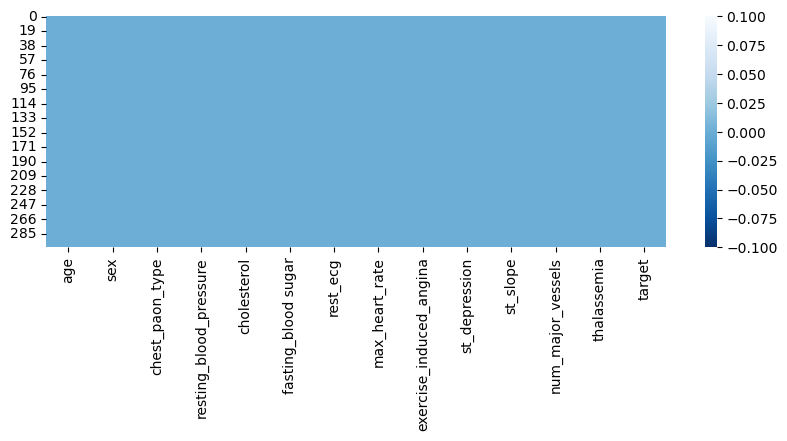

In [19]:
# Checking of missing values
print(ep.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(ep.isnull(), cbar=True, cmap='Blues_r')

## Exploratory Data Analysis

In [20]:
# Univariate data analysis

ep.columns

Index(['age', 'sex', 'chest_paon_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='num_major_vessels'>

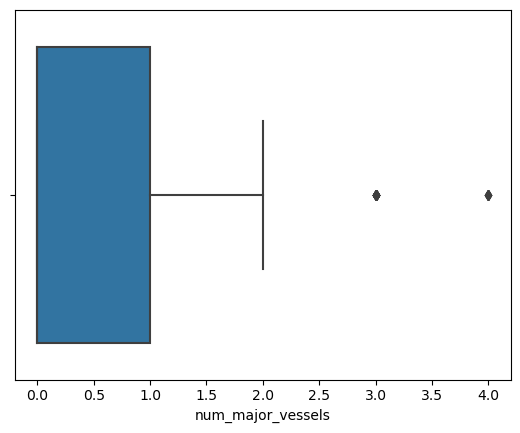

In [21]:
# Check for outliers
sns.boxplot(x=ep["num_major_vessels"])

<Axes: xlabel='thalassemia'>

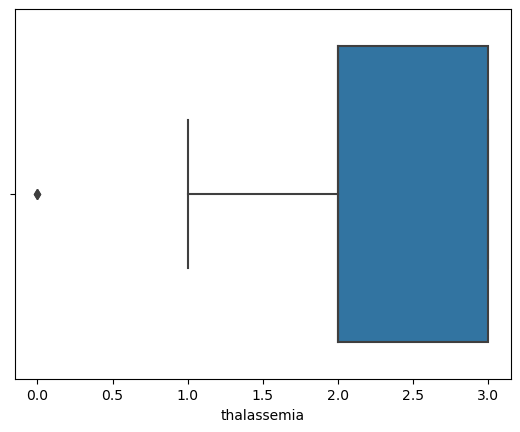

In [22]:
# Check for outliers
sns.boxplot(x=ep["thalassemia"])

<Axes: xlabel='cholesterol'>

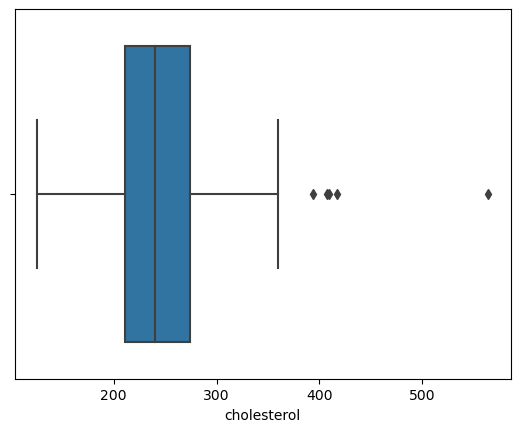

In [23]:
# Check for outliers
sns.boxplot(x=ep["cholesterol"])

<Axes: xlabel='resting_blood_pressure'>

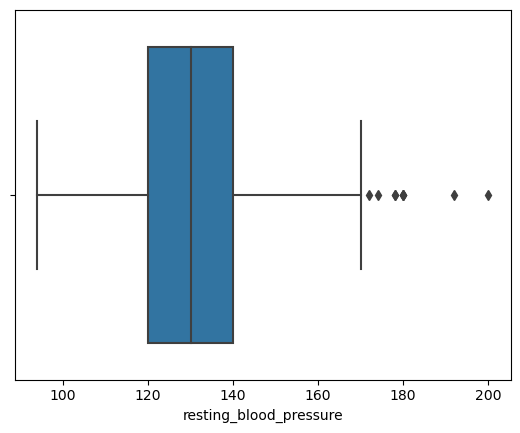

In [24]:
# Check for outliers
sns.boxplot(x=ep["resting_blood_pressure"])

<Axes: xlabel='max_heart_rate'>

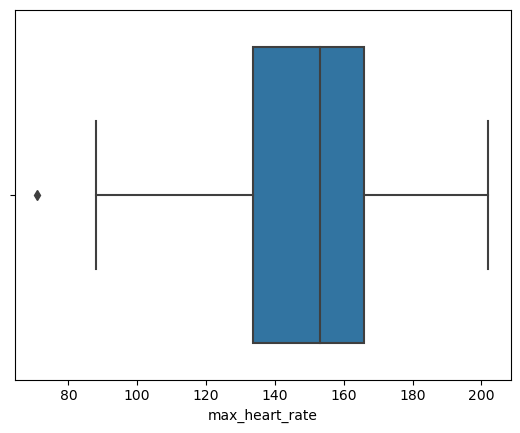

In [25]:
# Check for outliers
sns.boxplot(x=ep["max_heart_rate"])

Text(0.5, 1.0, 'Age Group category')

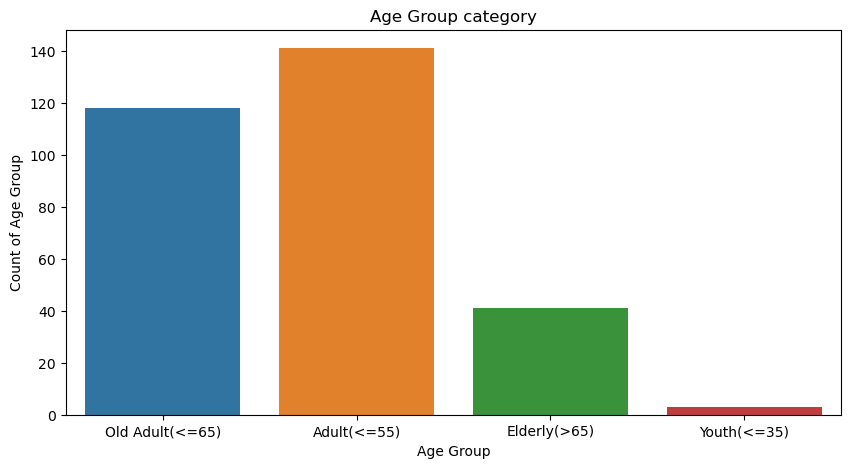

In [26]:
#Data Visualization
#Age_bracket
def age_bracket(age):
    if age<35:
        return "Youth(<=35)"
    elif age<55:
        return "Adult(<=55)"
    elif age<65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
    
ep["age_bracket"] = ep['age'].apply(age_bracket)

#Investigating the age group of the patient

plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=ep)
plt.xlabel('Age Group')    
plt.ylabel('Count of Age Group')    
plt.title('Age Group category')

In terms of patients, Adult age group has a significant number of patient compare to the other age groups

Text(0.5, 1.0, 'Gender Distribution')

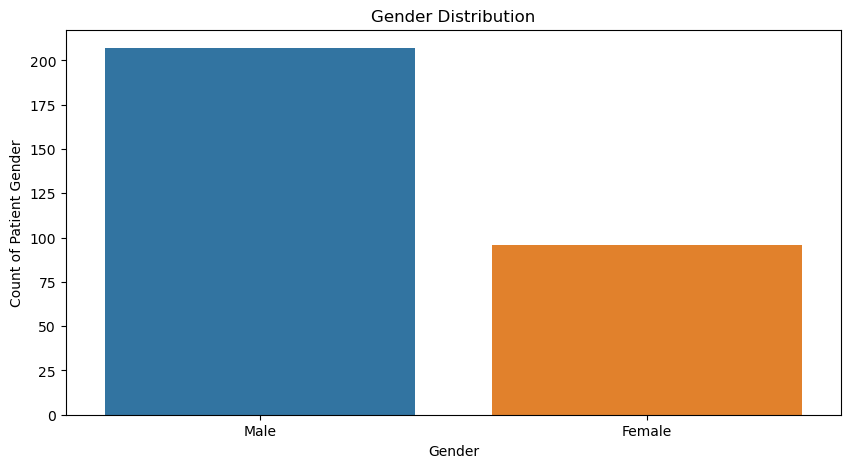

In [27]:
# Data Visualization
# Sex
def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"
    
ep["gender"] = ep['sex'].apply(gender)

#Investigating the age group of the patient

plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=ep)
plt.xlabel('Gender')    
plt.ylabel('Count of Patient Gender')    
plt.title('Gender Distribution')

In terms of patient gender, majority of the patient are Male

In [28]:
ep.head()

,age,sex,chest_paon_type,resting_blood_pressure,cholesterol,fasting_blood sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female


Text(0.5, 1.0, 'Chest pain patients ')

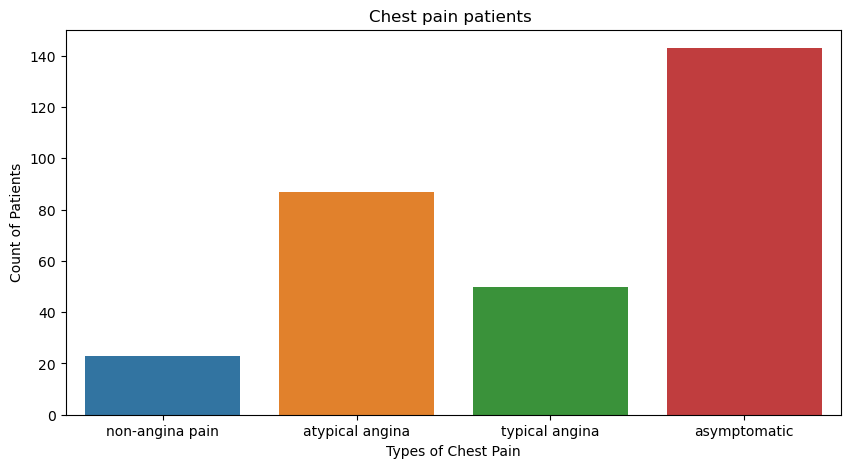

In [29]:
# Data Visualization
# Chest pain type (1: typical angina, 2: atypical angina, 3: non-angina pain, 4: asymptomatic)
def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-angina pain"
    else:
        return "asymptomatic"
    
ep["cp_cat"] = ep['chest_paon_type'].apply(chest_pain)

#Investigating the age group of the patient

plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=ep)
plt.xlabel('Types of Chest Pain')    
plt.ylabel('Count of Patients')    
plt.title('Chest pain patients ')

In terms of patient with chest pain, significant number of the patient as asymptomatic compared to the rest

label
Yes    165
No     138
Name: count, dtype: int64


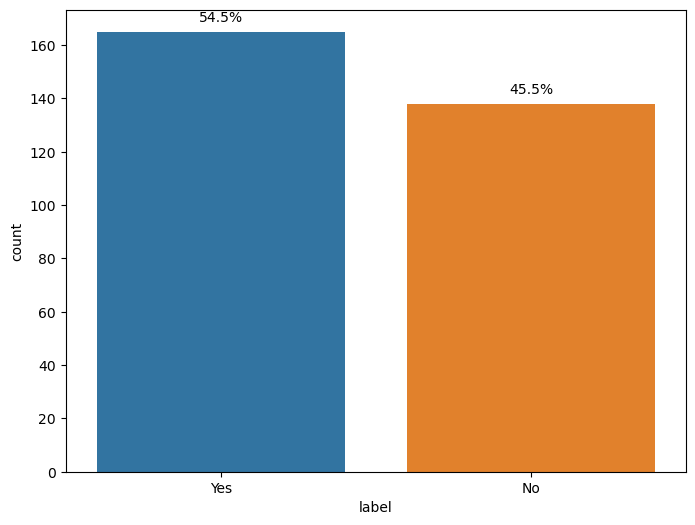

In [30]:
# Data Visualization
# target - have disease or not (1=yes, 0=no)
def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
    
ep["label"] = ep['target'].apply(label)

#Total patient in each category
print(ep["label"].value_counts())

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=ep)


total = len(ep['label'])
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


total = len(ep['label'])

From the visualization above, we can say 54.5% of the patient has heart disease while 45.5% don't have heart disease

## Bivariate Analysis

Text(0.5, 1.0, 'Age group of patient that has heart disease')

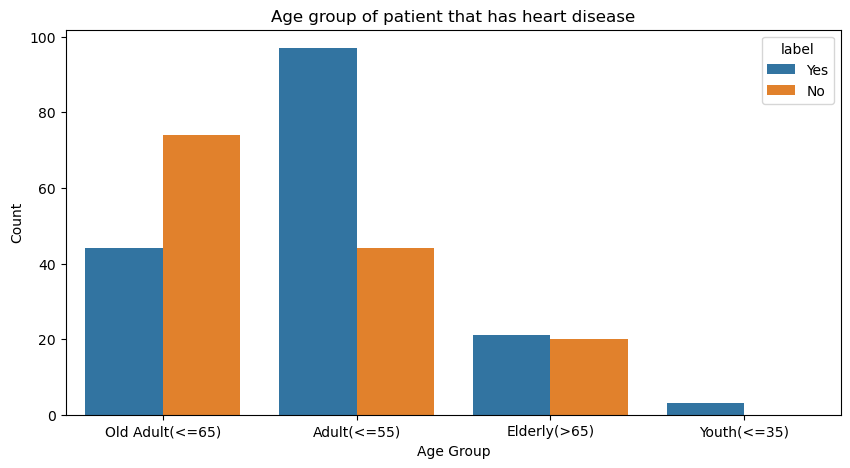

In [31]:
#Investigating the age group of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=ep, hue='label')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age group of patient that has heart disease")

In the visualization above, Adult age group have significant number of patient that has heart disease compared to the rest

Text(0.5, 1.0, 'Gender patient that has heart disease')

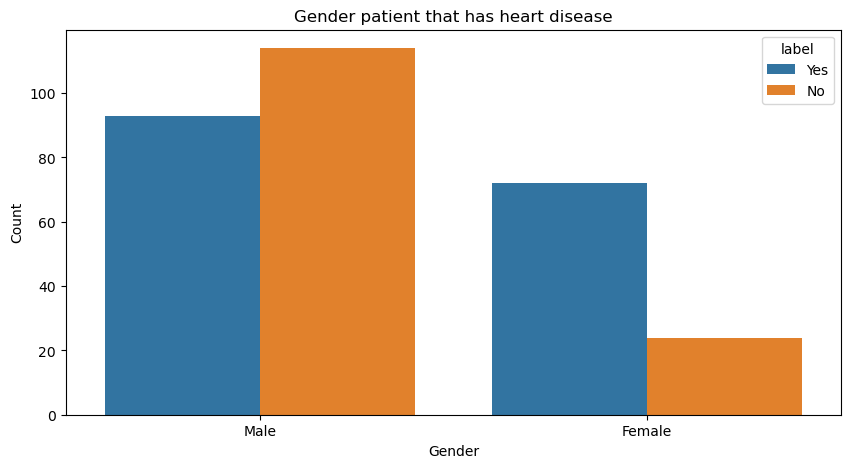

In [32]:
#Investigating the gender of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=ep, hue='label')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender patient that has heart disease")

In terms of gender distribution, Male patient are tend to have heart disease compared female patients


Text(0.5, 1.0, 'Patients with chest pain that has heart disease')

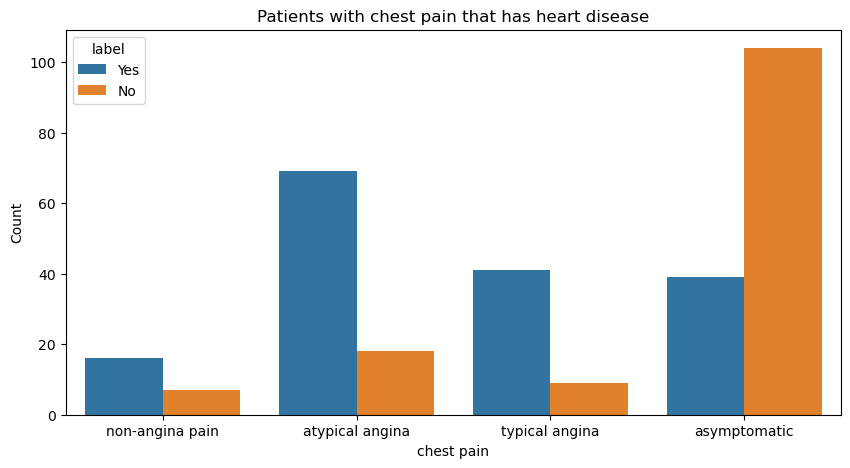

In [33]:
#Investigating the Chest pain of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=ep, hue='label')
plt.xlabel("chest pain")
plt.ylabel("Count")
plt.title("Patients with chest pain that has heart disease")

Patients with atypical chest pain tend to have a significant number of heart disease compared to the rest

## Multivariate Analysis

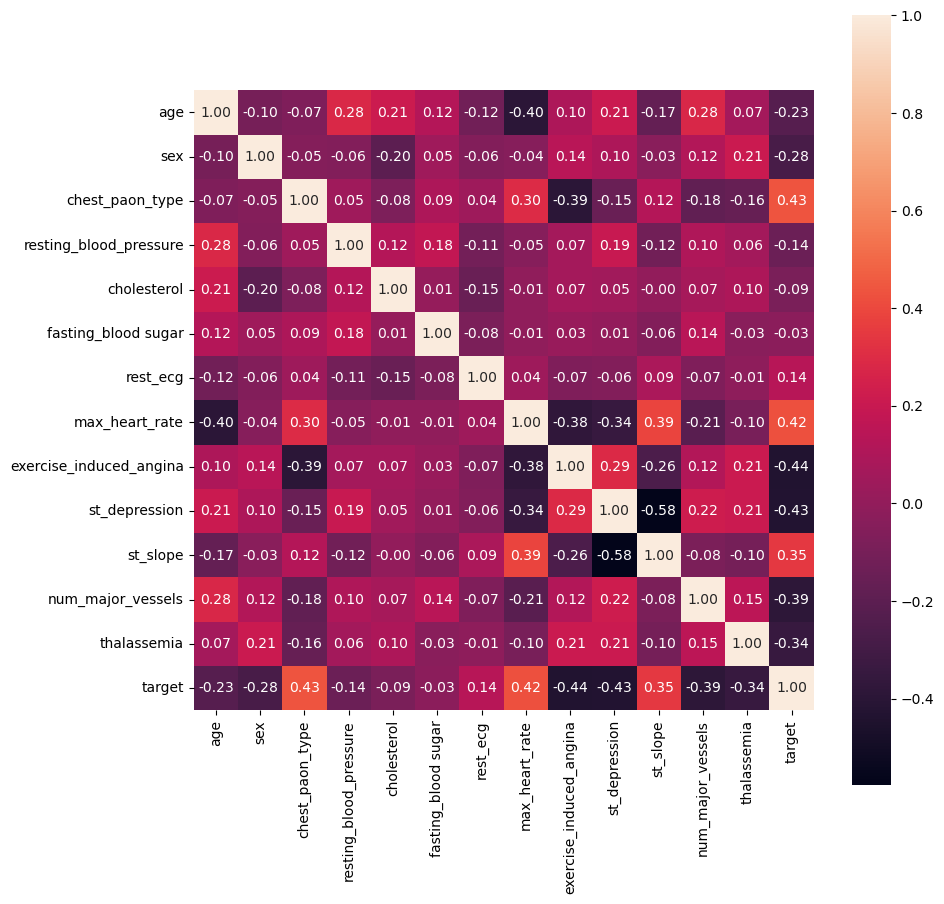

In [34]:
# Correlation between the variables in the dataset
plt.figure(figsize=(10,10))
numeric = ep.columns[ep.dtypes !='object']
ep_corr = ep[numeric].corr()
hm = sns.heatmap(ep_corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

In terms of correlation: chest_paon_type, max_heart_rate and st_slope have a low postive correlation (0.43, 0.42 and 0.35 repectively) and exercise_induced_angina, st_depression, num_major_vessels and thalassemia  have a low negative correlation(-0.44, -0.43, -0.39 and -0.34 respectively) suggesting a relationship with the target parameter.

## Data Pre-processing

##### Feature Engineering

In [35]:
# Create a copy of the data(Exclude target/label alongside other columns that was created)
ep1 = ep[["age", "sex", "chest_paon_type", "resting_blood_pressure", "cholesterol", "fasting_blood sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "st_depression", "st_slope", "num_major_vessels", "thalassemia"]]

label = ep[['target']]

In [36]:
ep1.head()

,age,sex,chest_paon_type,resting_blood_pressure,cholesterol,fasting_blood sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [37]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [38]:
ep1.dtypes

age                          int64
sex                          int64
chest_paon_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

#### Data Cleaning using normalization method

In [39]:
# Dealing with outliers - 'resting_blood_pressure', 'cholesterol', 'thalassemia', max_heart_rate,

# Normalize the data
scaler = MinMaxScaler()

ep1['Scaled_RBP'] = scaler.fit_transform(ep1['resting_blood_pressure'].values.reshape(-1, 1))
ep1['Scaled_chol'] = scaler.fit_transform(ep1['cholesterol'].values.reshape(-1, 1))
ep1['Scaled_thal'] = scaler.fit_transform(ep1['thalassemia'].values.reshape(-1, 1))
ep1['Scaled_max_heart_rate'] = scaler.fit_transform(ep1[['max_heart_rate']].values.reshape(-1, 1))
ep1['Scaled_num_major_vessels'] = scaler.fit_transform(ep1[['num_major_vessels']].values.reshape(-1, 1))


ep1.drop(['resting_blood_pressure', 'cholesterol', 'thalassemia', 'max_heart_rate','num_major_vessels'], axis=1, inplace=True)

ep1.head()

,age,sex,chest_paon_type,fasting_blood sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate,Scaled_num_major_vessels
0,63,1,3,1,0,0,2.3,0,0.481132,0.244292,0.333333,0.603053,0.0
1,37,1,2,0,1,0,3.5,0,0.339623,0.283105,0.666667,0.885496,0.0
2,41,0,1,0,0,0,1.4,2,0.339623,0.178082,0.666667,0.770992,0.0
3,56,1,1,0,1,0,0.8,2,0.245283,0.251142,0.666667,0.816794,0.0
4,57,0,0,0,1,1,0.6,2,0.245283,0.520548,0.666667,0.702290,0.0


## Machine Learning

In [40]:
# Split the dataset into training and testing sets - X = Questions, y = Answers

X_train, X_test, y_train, y_test = train_test_split(ep1, label, test_size=0.2, random_state=42)

In [41]:
X_train.head()

,age,sex,chest_paon_type,fasting_blood sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate,Scaled_num_major_vessels
132,42,1,1,0,1,0,0.0,2,0.245283,0.385845,0.666667,0.694656,0.0
202,58,1,0,0,0,1,0.8,2,0.528302,0.328767,1.000000,0.305344,0.0
196,46,1,2,0,1,0,3.6,1,0.528302,0.239726,0.666667,0.580153,0.0
75,55,0,1,0,0,0,1.4,1,0.386792,0.283105,0.666667,0.687023,0.0
176,60,1,0,1,1,1,1.4,2,0.216981,0.237443,1.000000,0.679389,0.5


In [42]:
y_train.head()

,target
132,1
202,0
196,0
75,1
176,0


In [43]:
# Model Building

# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8852459016393442
Precision: 0.9032258064516129
F1-score: 0.8888888888888888
AUC-ROC: 0.8857758620689655


In [44]:
X_test

,age,sex,chest_paon_type,fasting_blood sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate,Scaled_num_major_vessels
179,57,1,0,0,0,1,0.6,1,0.528302,0.342466,0.333333,0.312977,0.25
228,59,1,3,0,0,0,0.2,1,0.716981,0.369863,1.000000,0.671756,0.00
111,57,1,2,1,1,0,0.2,2,0.528302,0.000000,1.000000,0.778626,0.25
246,56,0,0,0,0,1,1.9,1,0.377358,0.646119,1.000000,0.603053,0.50
60,71,0,2,1,0,0,0.0,2,0.150943,0.317352,0.666667,0.450382,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,0,0,0,2.0,1,0.433962,0.292237,1.000000,0.572519,0.75
104,50,1,2,0,1,0,0.0,2,0.330189,0.159817,0.666667,0.702290,0.00
300,68,1,0,1,1,0,3.4,1,0.471698,0.152968,1.000000,0.534351,0.50
193,60,1,0,0,0,1,2.8,1,0.481132,0.356164,1.000000,0.541985,0.50


In [45]:
# Initialize and train the models

models = {"Decision Trees": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(random_state=42),
          "Logistic Regression": LogisticRegression(random_state=42),
          "SGD Classifier": SGDClassifier(random_state=42),
          "SVC": SVC(random_state=42),
          "Naive Bayes": GaussianNB(),
          "XGB Classifier": XGBClassifier(random_state=42)
         }

Classification report for Decision Trees: 
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61


Classification report for Random Forest: 
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Classification report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89    

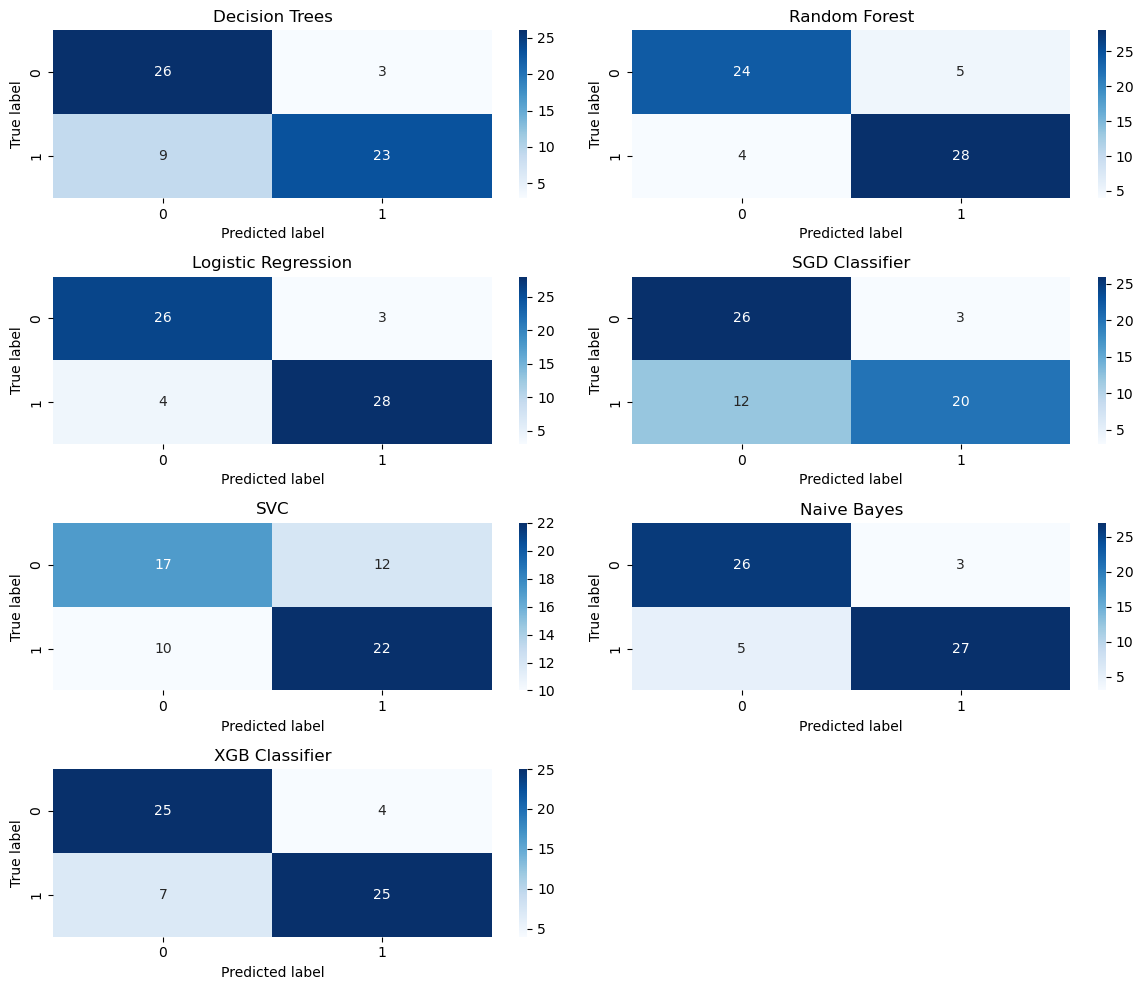

In [46]:
num_models = len(models)
num_rows = (num_models + 1) // 2  # Ensure an even number of rows

plt.figure(figsize=(12, 10))

for i, (model_name, model) in enumerate(models.items(), 1):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model using classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification report for {model_name}: \n{report}\n")
    
    # Compute confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.subplot(num_rows, 2, i)
    sns.heatmap(matrix, annot=True, fmt="", cmap="Blues")
    plt.title(f'{model_name}')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(f'{model_name}')
    
plt.tight_layout()
plt.show()

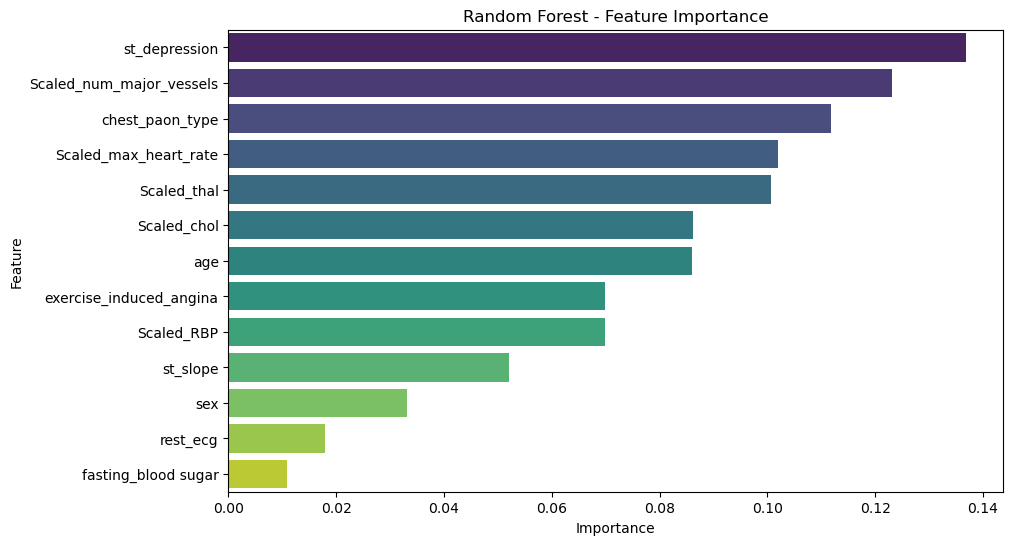

In [68]:
# Initialize and train the Random Forest model
scaler = MinMaxScaler()

# Train Random Forest Classifier
models['Random Forest'].fit(X_train, y_train)


# Get feature importances
feature_importances = models['Random Forest'].feature_importances_

# Create a DataFrame to store feature names and their importan ce scores
feature_importance_df = pd.DataFrame({'Feature': ep1.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

st_depression, Scaled_num_major_vessels, chest_paon_type and Scaled_max_heart_rate, are the most important feature(strong indicator) in the models
when considering its prediction. So in conclusion, the features stated earlier are actually the most important indicators
to notify whether or not a patient has heart disease 

In [107]:
ep1.columns

Index(['age', 'sex', 'chest_paon_type', 'fasting_blood sugar', 'rest_ecg',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'Scaled_RBP',
       'Scaled_chol', 'Scaled_thal', 'Scaled_max_heart_rate',
       'Scaled_num_major_vessels'],
      dtype='object')

 ### Pick some well performing features to train with and notice any change

Classification reports for Decision Trees are: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61
 

Classification reports for Random Forest are: 
               precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61
 

Classification reports for Logistic Regression are: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy               

<Figure size 1200x1000 with 0 Axes>

<Figure size 600x400 with 0 Axes>

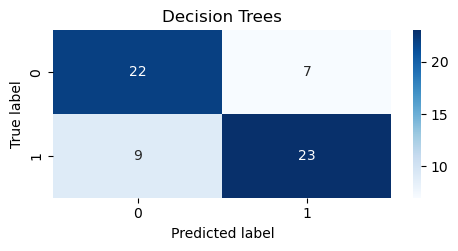

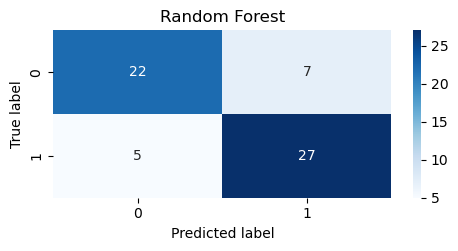

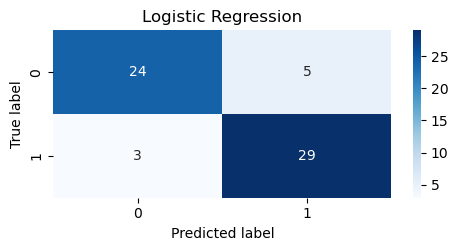

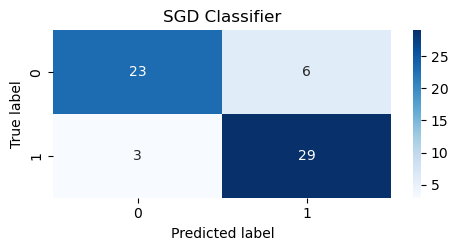

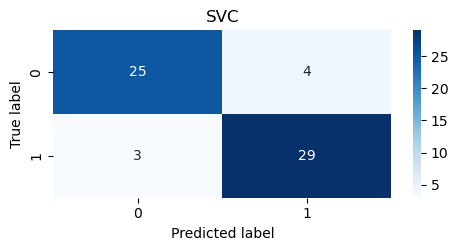

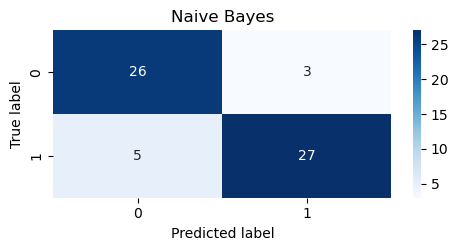

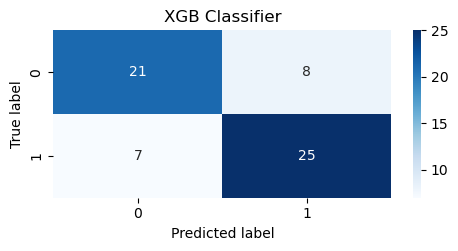

In [108]:
# Split the data into features (X) and target variable (y)
X = ep1[['st_depression', 'Scaled_num_major_vessels', 'chest_paon_type', 'Scaled_max_heart_rate', 'Scaled_thal']]
y = ep['target']

num_models = len(models)
num_rows = (num_models + 1) // 2  # Ensure an even number of rows

plt.figure(figsize=(12, 10))
# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features
scaler = MinMaxScaler()

model.fit(X_train, y_train)

       
import warnings

# Ignore UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.metrics._classification")

plt.figure(figsize=(6,4))



for i, (model_name, model) in enumerate(models.items(), 1):

    # Train the model
    model.fit(Xtrain, ytrain)

    # Make predictions on the test set
    y_pred = model.predict(Xtest)

    # Evaluate the model
    report = classification_report(ytest, y_pred)
    matrix = confusion_matrix(ytest, y_pred)
    

   
    print(f"Classification reports for {model_name} are: \n {report} \n")
    
    plt.figure(figsize=(12, 10))

    plt.subplot(num_rows, 2, i)
    sns.heatmap(matrix, annot=True, fmt="", cmap="Blues")
    plt.title(f'{model_name}')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Decision Trees:

Precision: The model correctly identifies 71% of class 0 instances and 77% of class 1 instances among all the instances it classified as belonging to those classes.
Recall: It captures 76% of all actual class 0 instances and 72% of all actual class 1 instances.
F1-score: The harmonic mean of precision and recall is 0.73 for class 0 and 0.74 for class 1.
Accuracy: The overall accuracy of the model is 74%.

Random Forest:

Precision: 81% for class 0 and 79% for class 1.
Recall: 76% for class 0 and 84% for class 1.
F1-score: 79% for class 0 and 82% for class 1.
Accuracy: The overall accuracy is 80%.

Logistic Regression:

Precision: 89% for class 0 and 85% for class 1.
Recall: 83% for class 0 and 91% for class 1.
F1-score: 86% for class 0 and 88% for class 1.
Accuracy: The overall accuracy is 87%.

SGD Classifier:

Precision: 88% for class 0 and 83% for class 1.
Recall: 79% for class 0 and 91% for class 1.
F1-score: 84% for class 0 and 87% for class 1.
Accuracy: The overall accuracy is 85%.

SVC:

Precision: 89% for class 0 and 88% for class 1.
Recall: 86% for class 0 and 91% for class 1.
F1-score: 88% for class 0 and 89% for class 1.
Accuracy: The overall accuracy is 89%.

Naive Bayes:

Precision: 84% for class 0 and 90% for class 1.
Recall: 90% for class 0 and 84% for class 1.
F1-score: 87% for class 0 and 87% for class 1.
Accuracy: The overall accuracy is 87%.
XGB Classifier:

Precision: 75% for class 0 and 76% for class 1.
Recall: 72% for class 0 and 78% for class 1.
F1-score: 74% for class 0 and 77% for class 1.
Accuracy: The overall accuracy is 75%.

Based on these metrics, the Support Vector Classifier (SVC) shows the best overall performance with the highest accuracy, precision, recall, and F1-score among all the models. Therefore, SVC appears to be the best model to use for this classification task.




